In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# load the dataset
df=pd.read_csv('Listing_of_All_Businesses.csv')
df.head()

,LOCATION ACCOUNT #,BUSINESS NAME,DBA NAME,STREET ADDRESS,CITY,ZIP CODE,LOCATION DESCRIPTION,MAILING ADDRESS,MAILING CITY,MAILING ZIP CODE,NAICS,PRIMARY NAICS DESCRIPTION,COUNCIL DISTRICT,LOCATION START DATE,LOCATION END DATE,LOCATION
0,0003217523-0001-2,MARIA OFELIA NUNEZ,LA CAMPANA HARDWARE,1017 W 88TH STREET,LOS ANGELES,90044-2119,1017 88TH 90044,1017 W 88TH STREET,LOS ANGELES,90044-2119,444130.0,Hardware stores,0,10/01/2020,NaN,"(33.9581, -118.2926)"
1,0003218270-0001-0,MONICA GALVAN,SQUARE ONE STUDIO BY MONICA,23655 NEWHALL AVENUE UNIT #B,NEWHALL,91321-3104,23655 NEWHALL 91321,23655 NEWHALL AVENUE UNIT #B,NEWHALL,91321-3104,NaN,NaN,0,11/01/2020,NaN,"(34.3697, -118.5139)"
2,0003211603-0001-0,ONE STOP HOLISTIC HEALTH LLC,NaN,1506 W MANCHESTER AVENUE,LOS ANGELES,90047-5424,1506 MANCHESTER 90047,1506 W MANCHESTER AVENUE,LOS ANGELES,90047-5424,NaN,NaN,8,09/03/2020,NaN,"(33.9597, -118.3028)"
3,0003245183-0001-6,VEGAN AF L.L.C.,NaN,941 FEDORA STREET APT #204,LOS ANGELES,90006-1426,941 FEDORA 90006,941 FEDORA STREET APT #204,LOS ANGELES,90006-1426,NaN,NaN,10,05/01/2021,NaN,"(34.0549, -118.2979)"
4,0003241915-0001-6,SKAB INC,NaN,21731 VENTURA BLVD SUITE #300,WOODLAND HILLS,91364-1851,21731 Ventura 91364-1851,NaN,NaN,NaN,532290.0,Other consumer goods rental,3,01/01/2020,NaN,"(34.1692, -118.6016)"


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556975 entries, 0 to 1556974
Data columns (total 16 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   LOCATION ACCOUNT #         1556975 non-null  object 
 1   BUSINESS NAME              1556975 non-null  object 
 2   DBA NAME                   243187 non-null   object 
 3   STREET ADDRESS             1556873 non-null  object 
 4   CITY                       1556854 non-null  object 
 5   ZIP CODE                   1556975 non-null  object 
 6   LOCATION DESCRIPTION       1556852 non-null  object 
 7   MAILING ADDRESS            340703 non-null   object 
 8   MAILING CITY               340709 non-null   object 
 9   MAILING ZIP CODE           340579 non-null   object 
 10  NAICS                      613599 non-null   float64
 11  PRIMARY NAICS DESCRIPTION  613599 non-null   object 
 12  COUNCIL DISTRICT           1556975 non-null  int64  
 13  LOCATION STA

In [2]:
# Drop rows with null values in specific columns
balanced_df = df.dropna(subset=['PRIMARY NAICS DESCRIPTION'])

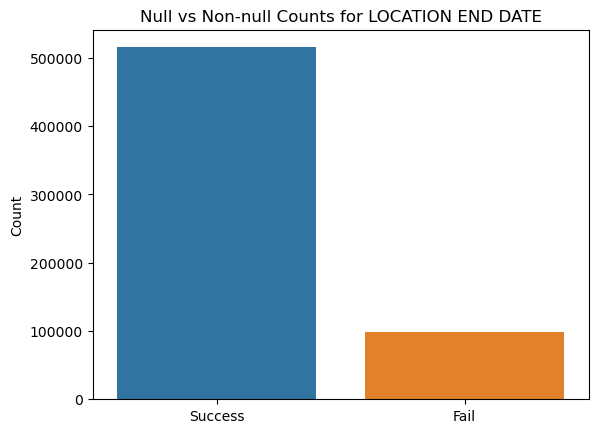

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame called df and a feature named 'your_feature'
feature = 'LOCATION END DATE'

# Create a new column for null and non-null classes
null_non_null_counts = balanced_df[feature].isnull().value_counts()

# Rename the index for better readability
null_non_null_counts.index = ['Success', 'Fail']

# Plotting the bar plot using seaborn or matplotlib
sns.barplot(x=null_non_null_counts.index, y=null_non_null_counts.values)

# Adding labels and title
plt.title(f'Null vs Non-null Counts for {feature}')
plt.ylabel('Count')
plt.show()


Majority class size (non-null): 515483
Minority class size (null): 98116
New class distribution after undersampling:
True     98116
False    98116
Name: LOCATION END DATE, dtype: int64


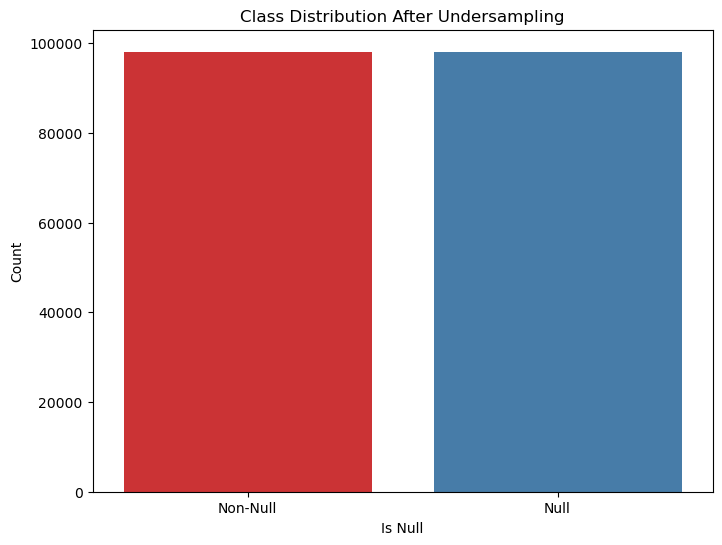

In [4]:
# Import necessary libraries
from sklearn.utils import resample
import pandas as pd

# Assuming balanced_df is your DataFrame with the target column containing null and non-null values

# Separate majority and minority classes
df_minority = balanced_df[balanced_df['LOCATION END DATE'].notnull()]  # Class with non-null values
df_majority = balanced_df[balanced_df['LOCATION END DATE'].isnull()]    # Class with null values

# Check sizes of both classes
print("Majority class size (non-null):", len(df_majority))
print("Minority class size (null):", len(df_minority))

# Perform random undersampling only if majority class is larger than minority class
if len(df_majority) > len(df_minority):
    df_majority_undersampled = resample(df_majority, 
                                         replace=False,         # Sample without replacement
                                         n_samples=len(df_minority),  # Match number of minority samples
                                         random_state=42)       # Seed for reproducibility

    # Combine undersampled majority and minority data
    df_undersampled = pd.concat([df_majority_undersampled, df_minority])
else:
    print("Majority class is not larger than minority class. No undersampling performed.")
    df_undersampled = balanced_df  # Use the original DataFrame if undersampling is not needed

# Check new class distribution
print("New class distribution after undersampling:")
print(df_undersampled['LOCATION END DATE'].isnull().value_counts())

# Optional: Plotting the class distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x=df_undersampled['LOCATION END DATE'].isnull(), palette='Set1')
plt.title('Class Distribution After Undersampling')
plt.xlabel('Is Null')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Null', 'Null'])
plt.show()


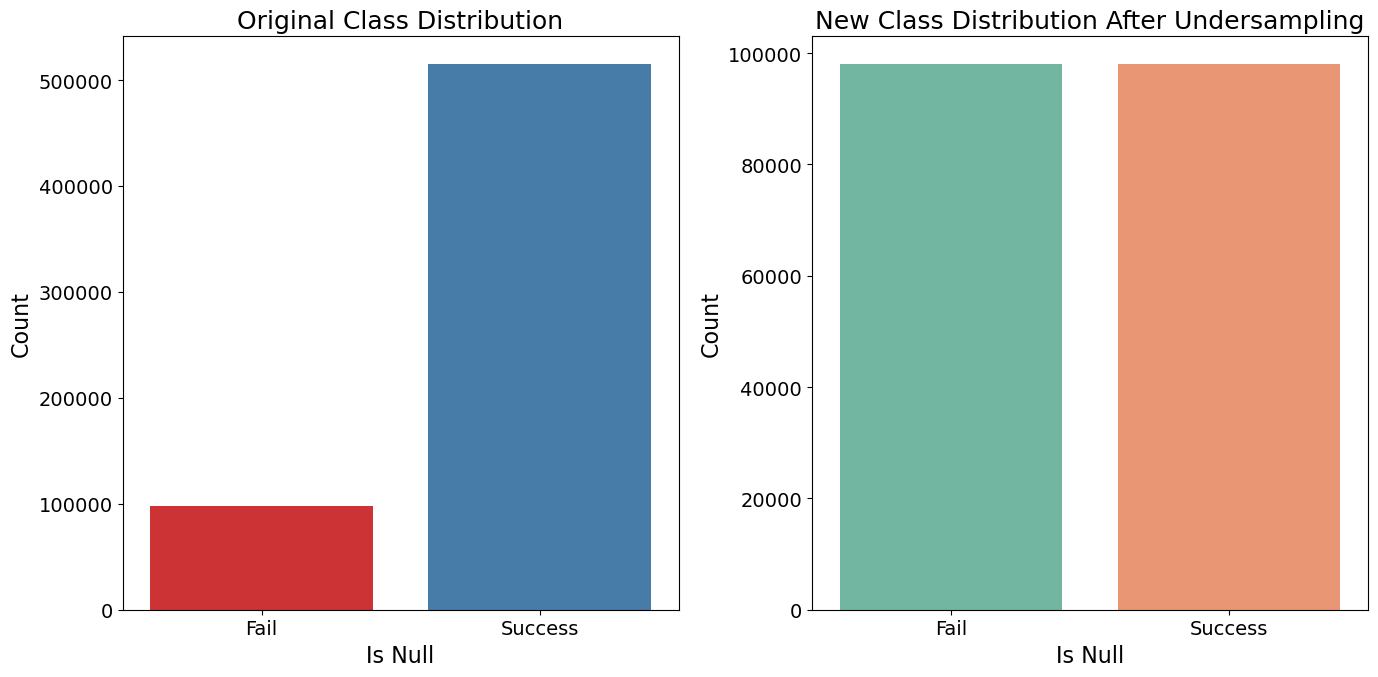

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set font size globally
plt.rcParams.update({'font.size': 14})  

plt.figure(figsize=(14, 7))  

# Plot original class distribution
plt.subplot(1, 2, 1) 
sns.countplot(x=balanced_df['LOCATION END DATE'].isnull(), palette='Set1')
plt.title('Original Class Distribution', fontsize=18)  
plt.xlabel('Is Null', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks([0, 1], ['Fail', 'Success'], fontsize=14)

# Plot new class distribution after undersampling
plt.subplot(1, 2, 2)  
sns.countplot(x=df_undersampled['LOCATION END DATE'].isnull(), palette='Set2')
plt.title('New Class Distribution After Undersampling', fontsize=18)  
plt.xlabel('Is Null', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks([0, 1], ['Fail', 'Success'], fontsize=14)

plt.tight_layout()
plt.savefig("Class_Distribution.png", bbox_inches='tight', dpi=300)
plt.show()


In [6]:
import pandas as pd


df_undersampled['LOCATION'] = df_undersampled['LOCATION'].str.strip('()')

# Split the 'Location' column into two separate columns (Latitude and Longitude)
df_undersampled[['Latitude', 'Longitude']] = df_undersampled['LOCATION'].str.split(', ', expand=True)

# Convert the Latitude and Longitude columns to numeric data types
df_undersampled['Latitude'] = pd.to_numeric(df_undersampled['Latitude'])
df_undersampled['Longitude'] = pd.to_numeric(df_undersampled['Longitude'])

# Check the DataFrame to ensure the splitting worked
print(df_undersampled[['Latitude', 'Longitude']].head())


         Latitude  Longitude
808852    34.0795  -118.2754
729974    34.0618  -118.2960
1060813   34.0369  -118.3490
1502694   33.9943  -118.2845
1473315   34.0613    34.0613


In [7]:
df_undersampled = df_undersampled.dropna(subset=['Longitude', 'Latitude', 'LOCATION START DATE', 'CITY'])

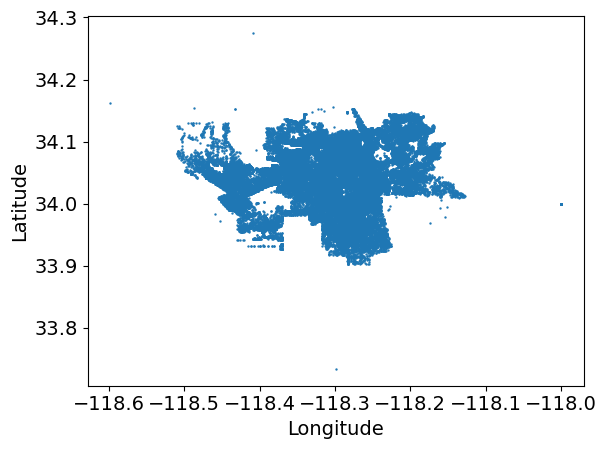

In [8]:
df_undersampled = df_undersampled[(df_undersampled['Longitude'] != 0) & (df_undersampled['Latitude'] != 0) 
                         & (df_undersampled['Longitude'] < 0) 
                         & (df_undersampled['CITY'] == 'LOS ANGELES')]
                         

# Plotting the scatter plot after dropping rows
df_undersampled.plot.scatter(x='Longitude', y='Latitude', s=0.5)

# Show the plot
plt.show()

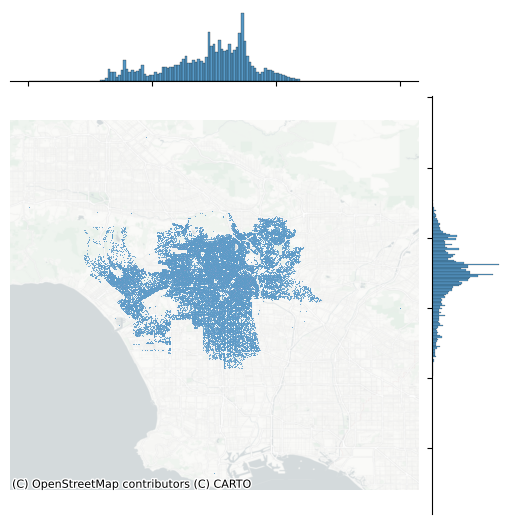

In [9]:
import matplotlib.pyplot as plt
from os.path import join
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import contextily as ctx
# Create scatter plot with histograms on axes
joint_axes = sns.jointplot(x='Longitude', y='Latitude', data=df_undersampled, s=0.5)

# Add basemap
ctx.add_basemap(joint_axes.ax_joint, crs="EPSG:4326", source=ctx.providers.CartoDB.PositronNoLabels)

# Remove axes
joint_axes.ax_joint.set_axis_off()

In [9]:
df_undersampled['Business Success'] = df_undersampled['LOCATION END DATE'].apply(lambda x: 1 if pd.isnull(x) else 0)
df_undersampled.head()

,LOCATION ACCOUNT #,BUSINESS NAME,DBA NAME,STREET ADDRESS,CITY,ZIP CODE,LOCATION DESCRIPTION,MAILING ADDRESS,MAILING CITY,MAILING ZIP CODE,NAICS,PRIMARY NAICS DESCRIPTION,COUNCIL DISTRICT,LOCATION START DATE,LOCATION END DATE,LOCATION,Latitude,Longitude,Business Success
808852,0002363602-0001-2,"FORMATION ASSOCIATION, LLC",NaN,722 PARKMAN AVENUE,LOS ANGELES,90026-3733,722 PARKMAN 90026-3733,NaN,NaN,NaN,541400.0,Specialized design services (including interio...,13,12/13/2007,NaN,"34.0795, -118.2754",34.0795,-118.2754,1
729974,0002270710-0001-4,HIGHLAND CAPITAL BROKERAGE,NaN,3345 WILSHIRE BLVD SUITE #715,LOS ANGELES,90010-1818,3345 WILSHIRE 90010-1818,NaN,NaN,NaN,524210.0,Insurance agencies & brokerages,10,01/01/2004,NaN,"34.0618, -118.296",34.0618,-118.2960,1
1060813,0002719665-0001-1,"LAW OFFICES OF EDWARD J. SINGER, A PROFESSIONA...",NaN,2222 S LA BREA AVENUE,LOS ANGELES,90016-2222,2222 LA BREA 90016-2222,2564 VIA TEJON,PALOS VERDES ESTATES,90274-1348,541100.0,Legal services,10,01/01/2013,NaN,"34.0369, -118.349",34.0369,-118.3490,1
1502694,0003224821-0001-2,ABNER FERNANDO GRAJEDA RUIZ,GRAJEDAS MAINTENANCE SERVICES,621 W 53RD STREET,LOS ANGELES,90037-3713,621 53RD 90037,3092 JAMES M WOOD BLVD,LOS ANGELES,90006-1513,812990.0,All other personal services,9,01/01/2020,NaN,"33.9943, -118.2845",33.9943,-118.2845,1
1357305,0003156317-0001-3,JOSE A GARCIA M,YJ SOLOMAN ROOTER SERVICE,11260 WESTMINSTER AVENUE APT #22,LOS ANGELES,90066-2970,11260 WESTMINSTER 90066-2970,NaN,NaN,NaN,235110.0,"Plumbing, Heating, and Air-Conditioning Contra...",11,10/22/2019,NaN,"34.0167, -118.4227",34.0167,-118.4227,1


In [10]:
df_undersampled['LOCATION START DATE'] = pd.to_datetime(df_undersampled['LOCATION START DATE'])
df_undersampled['Year'] = df_undersampled['LOCATION START DATE'].dt.year
df_undersampled['Month'] = df_undersampled['LOCATION START DATE'].dt.month
df_undersampled['Day'] = df_undersampled['LOCATION START DATE'].dt.day

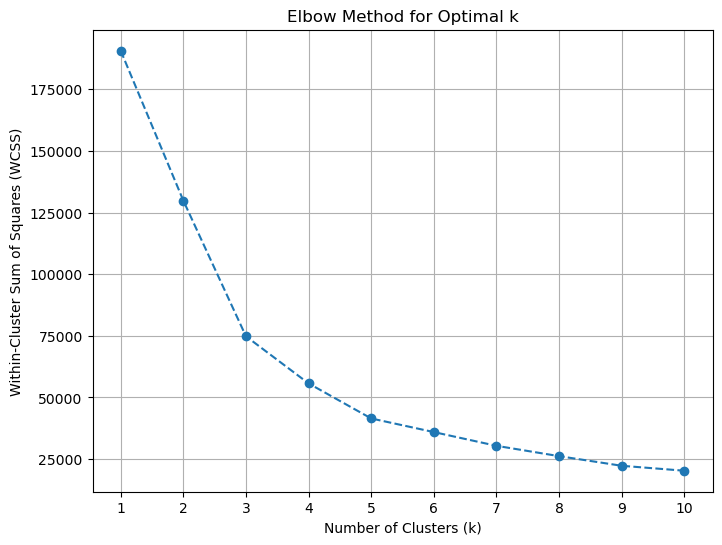

In [12]:
# ELBOW METHOD FOR BEST K IN K-MEANS
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(df_undersampled[['Longitude', 'Latitude'
                                                             ]]))

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [15]:
#K-MEANS CLUSTERING
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# Scale the entire dataframe'
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(df_undersampled[['Longitude', 'Latitude']]))
# Instantiate KMeans with the optimal number of clusters (k=5)
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit KMeans to your data
kmeans.fit(scaled_data)

# Get the cluster labels for each data point
kmeans_labels = kmeans.labels_

# Add the cluster labels to your DataFrame or data array
df_undersampled['Cluster_K-MEAN'] = kmeans_labels

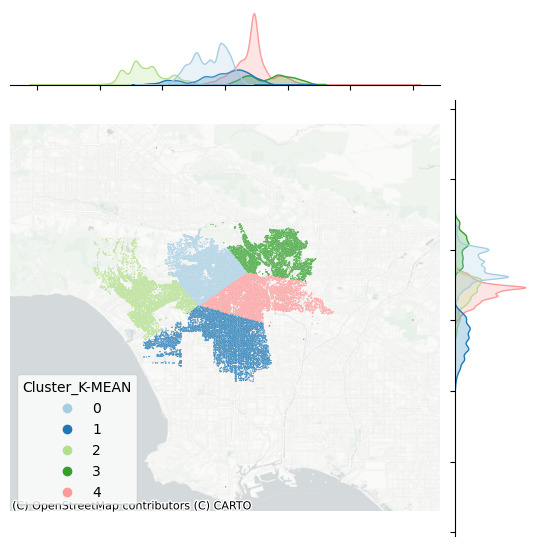

In [14]:
joint_axes = sns.jointplot(
    x='Longitude', y='Latitude', data=df_undersampled, 
    hue='Cluster_K-MEAN', palette='Paired', s=0.75, legend=True
)

#  Add the basemap
ctx.add_basemap(
    joint_axes.ax_joint, crs="EPSG:4326", source=ctx.providers.CartoDB.PositronNoLabels
)

#  Remove axes
joint_axes.ax_joint.set_axis_off()
# Save the plot as an image
plt.savefig("K-Means_representation.png", bbox_inches='tight', dpi=300)
# Show the plot
plt.show()

In [16]:
# Group the data by the cluster labels
cluster_groups = df_undersampled.groupby('Cluster_K-MEAN')

# Compute statistics for each feature within each cluster
# For example, the mean and count for relevant features
cluster_properties = cluster_groups.agg({
    'Longitude': ['mean', 'median', 'std'],
    'Latitude': ['mean', 'median', 'std'],
    'Business Success': ['mean', 'count'],  
    'Month' : ['mean', 'count'],
    'COUNCIL DISTRICT' : ['mean', 'count'],
})

# Display the properties for each cluster
print(cluster_properties)


                 Longitude                        Latitude                     \
                      mean     median       std       mean   median       std   
Cluster_K-MEAN                                                                  
0              -118.324479 -118.32170  0.027982  34.076953  34.0753  0.020416   
1              -118.305033 -118.29460  0.044509  33.973010  33.9747  0.024871   
2              -118.426145 -118.43010  0.031699  34.041688  34.0440  0.022287   
3              -118.227689 -118.22265  0.034016  34.105536  34.1073  0.019645   
4              -118.255238 -118.25510  0.030159  34.040053  34.0420  0.014758   

               Business Success            Month        COUNCIL DISTRICT  \
                           mean  count      mean  count             mean   
Cluster_K-MEAN                                                             
0                      0.434539  28200  4.845355  28200         9.098369   
1                      0.401900  14526  4.75698

In [17]:
clustered_data = df_undersampled.copy()  # Make a copy of the original data
clustered_data['Cluster_K-MEAN'] = kmeans_labels  # Add cluster labels to the DataFrame

# Group data by cluster label
grouped_data = clustered_data.groupby('Cluster_K-MEAN')

# Dictionary to store crime types in each cluster
crime_types_in_clusters = {}

# Iterate over clusters
for kmeans_labels, cluster_data in grouped_data:
    # Count occurrences of each crime type in the cluster
    crime_type_counts = cluster_data['PRIMARY NAICS DESCRIPTION'].value_counts()
    
    # Store the crime types in the cluster
    crime_types_in_clusters[kmeans_labels] = crime_type_counts

# Print crime types in each cluster
for kmeans_labels, crime_type_counts in crime_types_in_clusters.items():
    print(f"Cluster {kmeans_labels}:")
    print(crime_type_counts)
    print()

Cluster 0:
Lessors of real estate (including mini warehouses & self-storage units)    2155
All other personal services                                                1963
Independent artists, writers, & performers                                 1646
Full-service restaurants                                                   1184
Motion picture & video industries (except video rental)                    1161
                                                                           ... 
Securities & commodity exchanges                                              1
Boat dealers                                                                  1
Basic chemical mfg.                                                           1
Excavation Contractors (1997 NAICS)                                           1
Geophysical surveying & mapping services                                      1
Name: PRIMARY NAICS DESCRIPTION, Length: 274, dtype: int64

Cluster 1:
Lessors of real estate (including mini

In [24]:
from sklearn.metrics import silhouette_score
score = silhouette_score(scaled_data, kmeans_labels)
print(score)

0.4167576943364473


In [15]:
#DBSCAN CLUSTERING
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Specify the parameters for DBSCAN
eps = 0.05  
min_samples = 600   

# Create DBSCAN object
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit DBSCAN    
dbscan.fit(scaled_data)

# Extract cluster labels
dbscan_labels = dbscan.labels_

# Count the number of clusters (including noise points)
num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)  # Subtract 1 for noise points (-1 label)

# Count incidents in each cluster
cluster_incidents = pd.Series(dbscan_labels).value_counts()

# Saving the results to a file or data structure
cluster_incidents.to_csv('spatial_clusters.csv', header=['Incidents'])

# Add the cluster labels to your DataFrame or data array
df_undersampled['Cluster_DBSCAN'] = dbscan_labels

# Displaying the number of clusters and incidents in each cluster
print("Number of spatial clusters:", num_clusters)
print("Incidents in each spatial cluster:")
print(cluster_incidents)

Number of spatial clusters: 4
Incidents in each spatial cluster:
-1    83345
 1     7880
 0     2513
 2      977
 3      608
dtype: int64


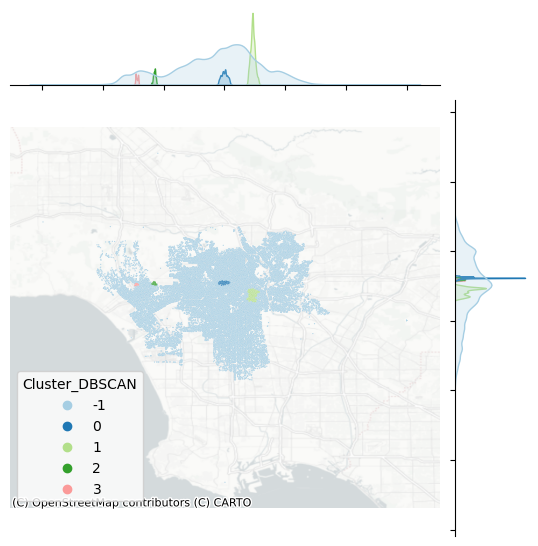

In [17]:
joint_axes = sns.jointplot(
    x='Longitude', y='Latitude', data=df_undersampled,
    hue='Cluster_DBSCAN', palette='Paired', s=0.75, legend=True
)

# Add the basemap
ctx.add_basemap(
    joint_axes.ax_joint, crs="EPSG:4326", source=ctx.providers.CartoDB.PositronNoLabels
)

# Remove axes
joint_axes.ax_joint.set_axis_off()
# Save the plot as an image
plt.savefig("DBSCAN_representation.png", bbox_inches='tight', dpi=300)
# Show the plot
plt.show()

In [29]:
import numpy as np
from permetrics import ClusteringMetric

# Ensure noise points (-1) are removed
valid_indices = dbscan_labels != -1
filtered_data = scaled_data[valid_indices]
filtered_labels = dbscan_labels[valid_indices]

# Convert to numpy arrays if not already
data = np.array(filtered_data)
y_pred = np.array(filtered_labels)

# Calculate the DBCV score
cm = ClusteringMetric(X=data, y_pred=y_pred)

# Print clustering metrics
print(cm.density_based_clustering_validation_index())
print(cm.DBCVI())


0.7888910945928684
0.7888910945928684


In [16]:
# Group the data by the cluster labels
cluster_groups1 = df_undersampled.groupby('Cluster_DBSCAN')

# Compute statistics for each feature within each cluster
# For example, the mean and count for relevant features
cluster_properties1 = cluster_groups1.agg({
    'Longitude': ['mean', 'median', 'std'],
    'Latitude': ['mean', 'median', 'std'],
    'Business Success': ['mean', 'count'],  
    'Month' : ['mean', 'count'],
    'COUNCIL DISTRICT' : ['mean', 'count'],
})

# Display the properties for each cluster
print(cluster_properties1)

                 Longitude                       Latitude                     \
                      mean    median       std       mean   median       std   
Cluster_DBSCAN                                                                 
-1             -118.313142 -118.3039  0.071236  34.047041  34.0515  0.045790   
 0             -118.300457 -118.3006  0.004821  34.061904  34.0617  0.001347   
 1             -118.253604 -118.2536  0.003700  34.042537  34.0440  0.005601   
 2             -118.415298 -118.4149  0.001853  34.060631  34.0609  0.001323   
 3             -118.444133 -118.4444  0.001816  34.058804  34.0586  0.000930   

               Business Success            Month        COUNCIL DISTRICT  \
                           mean  count      mean  count             mean   
Cluster_DBSCAN                                                             
-1                     0.453285  83345  4.793485  83345         8.507349   
 0                     0.309988   2513  5.275766   2513

In [31]:
clustered_data = df_undersampled.copy()  # Make a copy of the original data
clustered_data['Cluster_DBSCAN'] = dbscan_labels  # Add cluster labels to the DataFrame

# Group data by cluster label
grouped_data = clustered_data.groupby('Cluster_DBSCAN')

# Dictionary to store crime types in each cluster
crime_types_in_clusters = {}

# Iterate over clusters
for dbscan_labels, cluster_data in grouped_data:
    # Count occurrences of each crime type in the cluster
    crime_type_counts = cluster_data['PRIMARY NAICS DESCRIPTION'].value_counts()
    
    # Store the crime types in the cluster
    crime_types_in_clusters[dbscan_labels] = crime_type_counts

# Print crime types in each cluster
for dbscan_labels, crime_type_counts in crime_types_in_clusters.items():
    print(f"Cluster {dbscan_labels}:")
    print(crime_type_counts)
    print()

Cluster -1:
Lessors of real estate (including mini warehouses & self-storage units)         7069
All other personal services                                                     5808
Independent artists, writers, & performers                                      3498
Full-service restaurants                                                        2636
Motion picture & video industries (except video rental)                         2370
                                                                                ... 
Credit bureaus                                                                     2
Recreational vehicle dealers (including motor home & travel trailer dealers)       2
Telecommunications Resellers                                                       1
Cellular and Other Wireless Telecommunications                                     1
Interurban & rural bus transportation                                              1
Name: PRIMARY NAICS DESCRIPTION, Length: 285, dtype: 

In [11]:
frequency_map_street_address = df_undersampled['STREET ADDRESS'].value_counts(normalize=True)
df_undersampled['STREET ADDRESS ENCODED'] = df_undersampled['STREET ADDRESS'].map(frequency_map_street_address)

frequency_map_city = df_undersampled['CITY'].value_counts(normalize=True)
df_undersampled['CITY ENCODED'] = df_undersampled['CITY'].map(frequency_map_city)

frequency_map_zip_code = df_undersampled['ZIP CODE'].value_counts(normalize=True)
df_undersampled['ZIP CODE ENCODED'] = df_undersampled['ZIP CODE'].map(frequency_map_zip_code)

frequency_map_loc_desc = df_undersampled['LOCATION DESCRIPTION'].value_counts(normalize=True)
df_undersampled['LOCATION DESCRIPTION ENCODED'] = df_undersampled['LOCATION DESCRIPTION'].map(frequency_map_loc_desc)


In [16]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import numpy as np

# Scale the features
scaler = MinMaxScaler()
X = scaler.fit_transform(df_undersampled[['STREET ADDRESS ENCODED', 'CITY ENCODED', 
                                          'ZIP CODE ENCODED','NAICS', 
                                          'Month', 'Day', 'Year', 'Latitude', 'Longitude', 
                                          'LOCATION DESCRIPTION ENCODED']])
y = df_undersampled['Business Success']

# Define k-NN model
knn = KNeighborsClassifier()

# Define parameters for grid search
param_grid = {'n_neighbors': range(1, 21)}

# Define k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=kf, scoring='accuracy')
grid_search.fit(X, y)

# Print best parameter and best score
print("Best k value:", grid_search.best_params_['n_neighbors'])
print("Best Accuracy:", grid_search.best_score_)

# Get the best model
best_knn = grid_search.best_estimator_

# Calculate and print confusion matrix and accuracies for each fold
conf_matrices = []
train_accuracies = []
test_accuracies = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit and predict with the best model
    best_knn.fit(X_train, y_train)
    y_train_pred = best_knn.predict(X_train)
    y_test_pred = best_knn.predict(X_test)
    
    # Train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Calculate confusion matrix for this fold
    conf_matrices.append(confusion_matrix(y_test, y_test_pred))

# Average confusion matrix across all folds
avg_conf_matrix = np.mean(conf_matrices, axis=0)
print("Average Confusion Matrix:\n", avg_conf_matrix)

# Average train and test accuracies
print("Average Train Accuracy:", np.mean(train_accuracies))
print("Average Test Accuracy:", np.mean(test_accuracies))


Best k value: 19
Best Accuracy: 0.6883858366462592
Average Confusion Matrix:
 [[8348.4 2335.6]
 [3605.2 4775.4]]
Average Train Accuracy: 0.7245837850381918
Average Test Accuracy: 0.6883858366462592


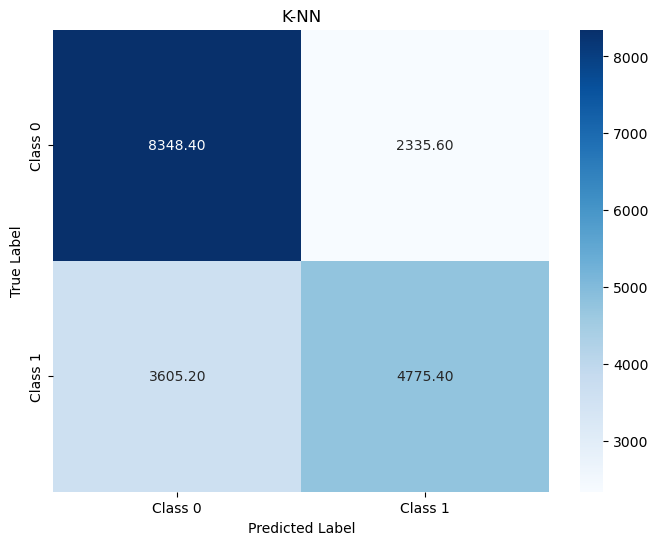

In [19]:
# Plot the average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(avg_conf_matrix, annot=True, fmt=".2f", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("K-NN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
# Save the figure
plt.savefig("KNN_confusion_matrix.png", format="png", dpi=300)
plt.show()

Best parameters with regularization: {'C': 0.01, 'penalty': 'l1'}
Best cross-validated accuracy with regularization: 0.6829579304864902
Test set accuracy with regularization: 0.6800944138473642
Training set accuracy with regularization: 0.6811350940229222


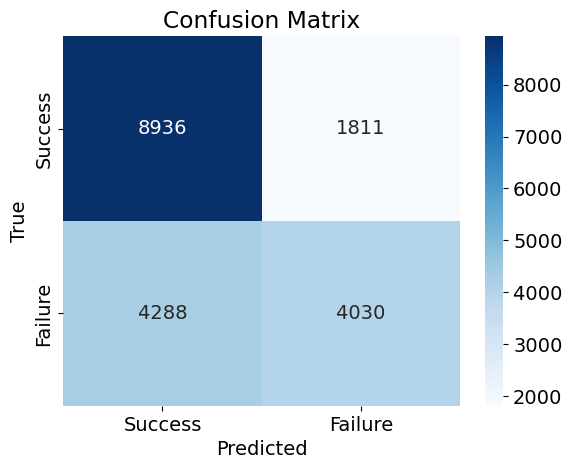

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Scale the features
scaler = MinMaxScaler()
X = scaler.fit_transform(df_undersampled[['STREET ADDRESS ENCODED', 'CITY ENCODED', 
                                          'ZIP CODE ENCODED','NAICS', 
                                          'Month', 'Day', 'Year', 'Latitude', 'Longitude', 
                                          'LOCATION DESCRIPTION ENCODED']])
y = df_undersampled['Business Success']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define logistic regression model
logistic_regression = LogisticRegression(solver='saga', max_iter=10000)

# Define parameters for grid search
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2', 'l1']  
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='accuracy', error_score='raise')
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters with regularization:", grid_search.best_params_)
print("Best cross-validated accuracy with regularization:", grid_search.best_score_)

# Train the best model on the entire training set
best_logistic_regression = grid_search.best_estimator_
best_logistic_regression.fit(X_train, y_train)

# Predict on the test set
y_pred = best_logistic_regression.predict(X_test)

# Evaluate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy with regularization:", test_accuracy)

# Calculate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Evaluate accuracy on the training set
y_train_pred = best_logistic_regression.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training set accuracy with regularization:", train_accuracy)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Success', 'Failure'], yticklabels=['Success', 'Failure'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


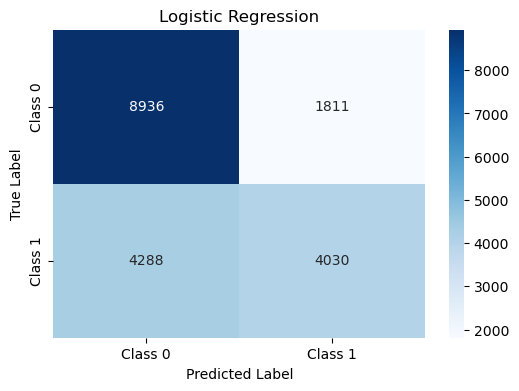

In [21]:
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
# Save the figure
plt.savefig("Logistic_Regression_confusion_matrix.png", format="png", dpi=300)
plt.show()

Best parameters found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 300}
Best accuracy (cross-validated):  0.7256419862524911
Test Accuracy: 0.7238394964594808
Training Accuracy: 0.8437016444176348


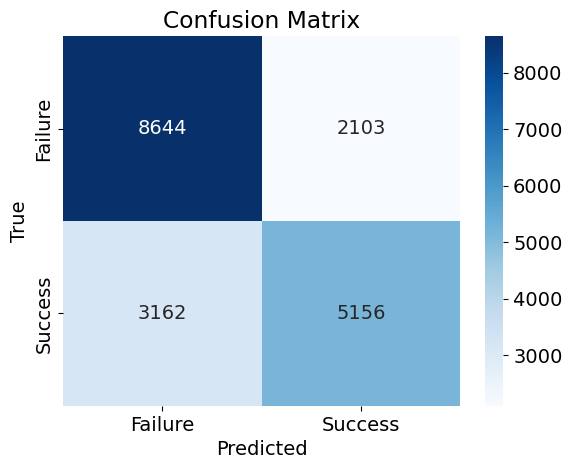

Training Accuracy: 0.8437016444176348


In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Scaler: StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df_undersampled[['STREET ADDRESS ENCODED', 'CITY ENCODED', 
                                          'ZIP CODE ENCODED', 'NAICS', 
                                          'Month', 'Day', 'Year', 'Latitude', 'Longitude', 
                                          'LOCATION DESCRIPTION ENCODED']])

y = df_undersampled['Business Success']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the RandomForest model
model = RandomForestClassifier(random_state=42)

# Extend the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 30, 50],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [2, 4, 6],
    'max_features': ['sqrt']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy (cross-validated): ", grid_search.best_score_)

# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")

# Calculate training accuracy
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

# Calculate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Failure', 'Success'], yticklabels=['Failure', 'Success'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")


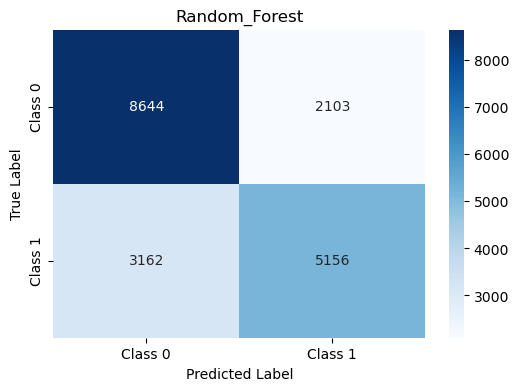

In [23]:
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Random_Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig("Random_Forest_confusion_matrix.png", format="png", dpi=300)
plt.show()

In [18]:
# Extreme Gradient Boosting (XGBoost)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import numpy as np

# Scale the features
scaler = MinMaxScaler()
X = scaler.fit_transform(df_undersampled[['STREET ADDRESS ENCODED', 'CITY ENCODED', 
                                          'ZIP CODE ENCODED','NAICS', 
                                          'Month', 'Day', 'Year', 'Latitude', 'Longitude', 
                                          'LOCATION DESCRIPTION ENCODED']])
y = df_undersampled['Business Success']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define XGBoost model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Define parameters for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.7, 0.8, 0.9, 1.0],  
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]  
}

# Perform grid search with cross-validation on the training set
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Get the best model
best_xgb = grid_search.best_estimator_

# Predict on the training set and test set
y_train_pred = best_xgb.predict(X_train)
y_test_pred = best_xgb.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train set accuracy:", train_accuracy)
print("Test set accuracy:", test_accuracy)

# Calculate confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)


Best parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best cross-validation accuracy: 0.7276745237739888
Train set accuracy: 0.7458627291562853
Test set accuracy: 0.7270390768423813
Confusion Matrix:
 [[8561 2123]
 [3081 5300]]


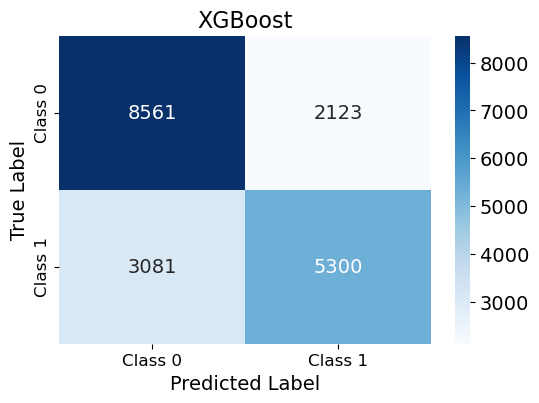

In [19]:
# Plot the confusion matrix
plt.figure(figsize=(6, 4))

# Heatmap with larger annotations
sns.heatmap(
    conf_matrix, 
    annot=True, 
    fmt="d", 
    cmap="Blues", 
    xticklabels=['Class 0', 'Class 1'], 
    yticklabels=['Class 0', 'Class 1'], 
    annot_kws={"fontsize": 14}  # Increase font size for annotations
)

# Add title and axis labels with larger font sizes
plt.title("XGBoost", fontsize=16)       # Larger title font size
plt.xlabel("Predicted Label", fontsize=14)    # Larger x-axis label font size
plt.ylabel("True Label", fontsize=14)         # Larger y-axis label font size

# Adjust tick label font sizes
plt.xticks(fontsize=12)  # Increase font size for x-axis ticks
plt.yticks(fontsize=12)  # Increase font size for y-axis ticks

# Save the figure
plt.savefig("XGBoost_confusion_matrix.png", format="png", dpi=300)
plt.show()

Best parameters found: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.7}
Best cross-validated accuracy: 0.728684260092372
Test set accuracy: 0.7270915289798059


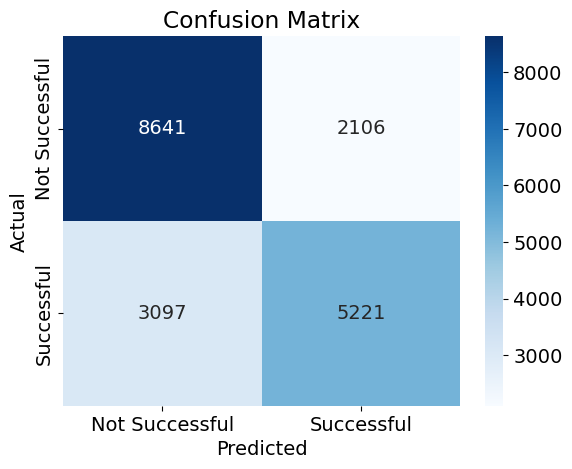

                        Feature  Importance
6                          Year    0.174231
2                         NAICS    0.053192
8                     Longitude    0.020391
7                      Latitude    0.017788
1              ZIP CODE ENCODED    0.010230
9  LOCATION DESCRIPTION ENCODED    0.009609
4                         Month    0.007189
5                           Day    0.006810
0        STREET ADDRESS ENCODED    0.003487
3              COUNCIL DISTRICT    0.002728


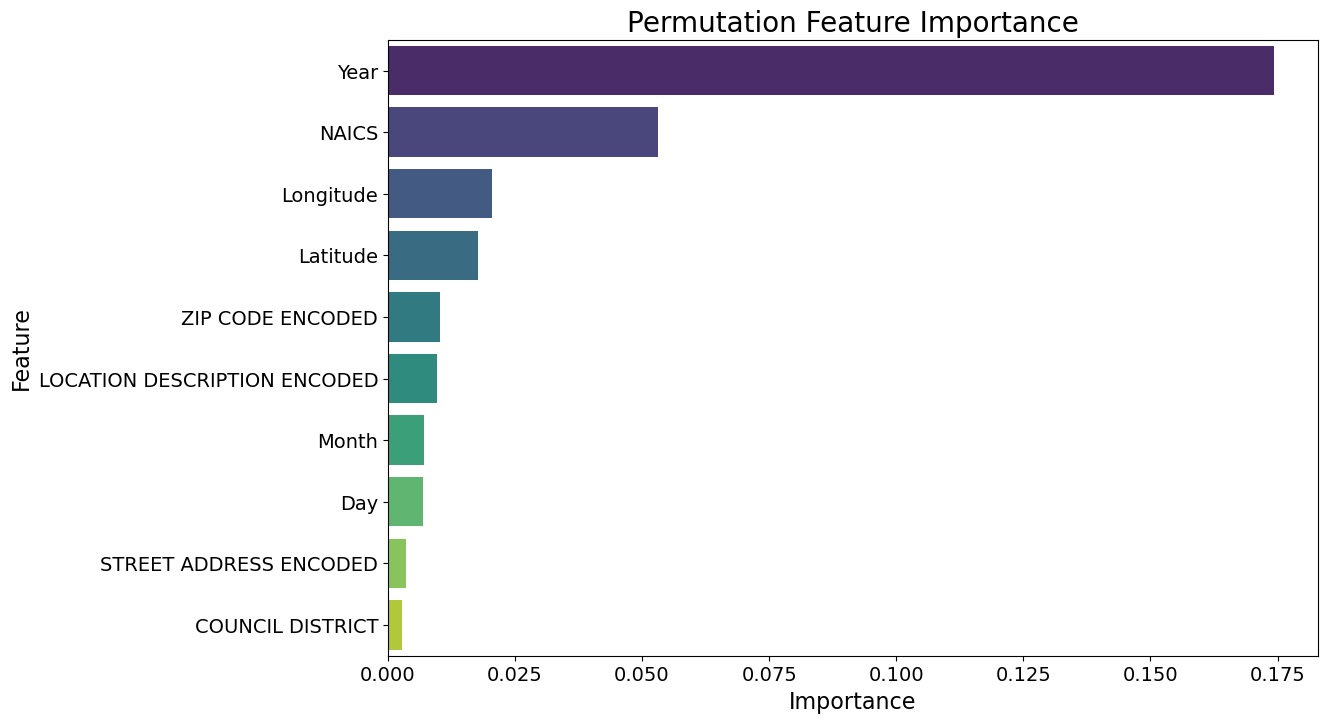

In [17]:
# Permutation Feature Importance
import pandas as pd
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.inspection import permutation_importance
import seaborn as sns
import matplotlib.pyplot as plt

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(df_undersampled[['STREET ADDRESS ENCODED', 
                                          'ZIP CODE ENCODED', 'NAICS', 'COUNCIL DISTRICT', 
                                          'Month', 'Day', 'Year', 'Latitude', 'Longitude', 
                                          'LOCATION DESCRIPTION ENCODED']])
y = df_undersampled['Business Success']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define XGBoost model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Define parameters for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.7, 0.8, 0.9, 1.0],  
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]  
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)

# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy}")

# Calculate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Successful', 'Successful'], yticklabels=['Not Successful', 'Successful'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate permutation feature importance
perm_importance = permutation_importance(best_model, X_train, y_train, n_repeats=10, random_state=42, n_jobs=-1)

# Extract feature names
feature_names = ['STREET ADDRESS ENCODED', 'ZIP CODE ENCODED', 'NAICS', 
                 'COUNCIL DISTRICT', 'Month', 'Day', 'Year', 'Latitude', 'Longitude', 
                 'LOCATION DESCRIPTION ENCODED']

# Create a DataFrame for permutation importance
perm_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Display feature importance
print(perm_importance_df)

# Plot permutation feature importance with larger text
plt.figure(figsize=(12, 8))  
sns.barplot(x='Importance', y='Feature', data=perm_importance_df, palette='viridis')

# Set title and labels with larger font sizes
plt.title('Permutation Feature Importance', fontsize=20)
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Feature', fontsize=16)

# Adjust tick label sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Save and display the plot
plt.savefig("Permutation_Importance.png", format="png", dpi=300, bbox_inches='tight')
plt.show()

